<a href="https://colab.research.google.com/github/vincentattafynn/Data-Science-Journey/blob/main/Machine%20Learning/Visual%20Data%20Analysis/Visual_Data_Analysis_in_Python_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["image.cmap"] = "viridis"

import pandas as pd

The dataset we're using is one from kaggle on video games sales and ratings. Some games lack ratings so we will filter them out

In [ ]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
df = pd.read_csv(DATA_URL + "video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


Printing the summary of the DataFrame next to make sure everything is not null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


We see that pandas has loaded some of the numerical features as an object type, so we will convert those to float and int

In [ ]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

The DataFrame contains 6825 examples and 16 columns. Let's look at the first few entries with the head() method to check that everything has been parsed correctly. To make it more convenient, We have only listed the variables that was used in the tutorial.

In [ ]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()


,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


The simplest way to visualize data is using the dataframe's plot method.

We will create a plot of video game sales by country and year. First we willkeep only the columns we will need, then calculate the total sales by year and call the plot method on the resulting DataFrame.

The first column represents the y axis and the second after the + represents the x.

<Axes: xlabel='Year_of_Release'>

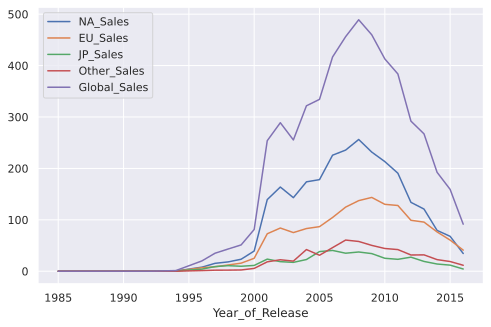

In [ ]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby("Year_of_Release").sum().plot()

The implementation of the plot() method in pandas is based on matplotlib.

Using the kind parameter, you can change the type of plot to for example, a bar chart. You can change almost everything in the chart, for example the rot parameter is responsible for the rotation of ticks on the x-axis (for vertical plots)

<Axes: xlabel='Year_of_Release'>

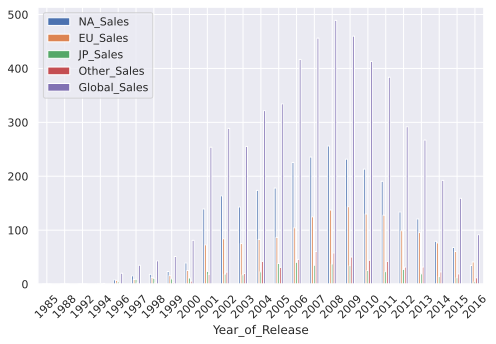

In [ ]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby("Year_of_Release").sum().plot(kind="bar", rot=45)

#Seaborn
Seaborn is essentially a higher-level API based on the matplotlib library. Among other thins, it differs from the latter in that it contains more adequate default settings for plotting. By adding
```
import seaborn as sns; sns.set
```
in your code, the images of the olots become nicer. Also, this library contains a set of complex tools for visualization the would otherwise require a large amount of code when using matplotlib.

##pairplot()
Pairplot or pairwise relationships plot creates a matrix of scatter plot by default. This kind of plot helps us to visualize the relationshiop between different variables in a single output.




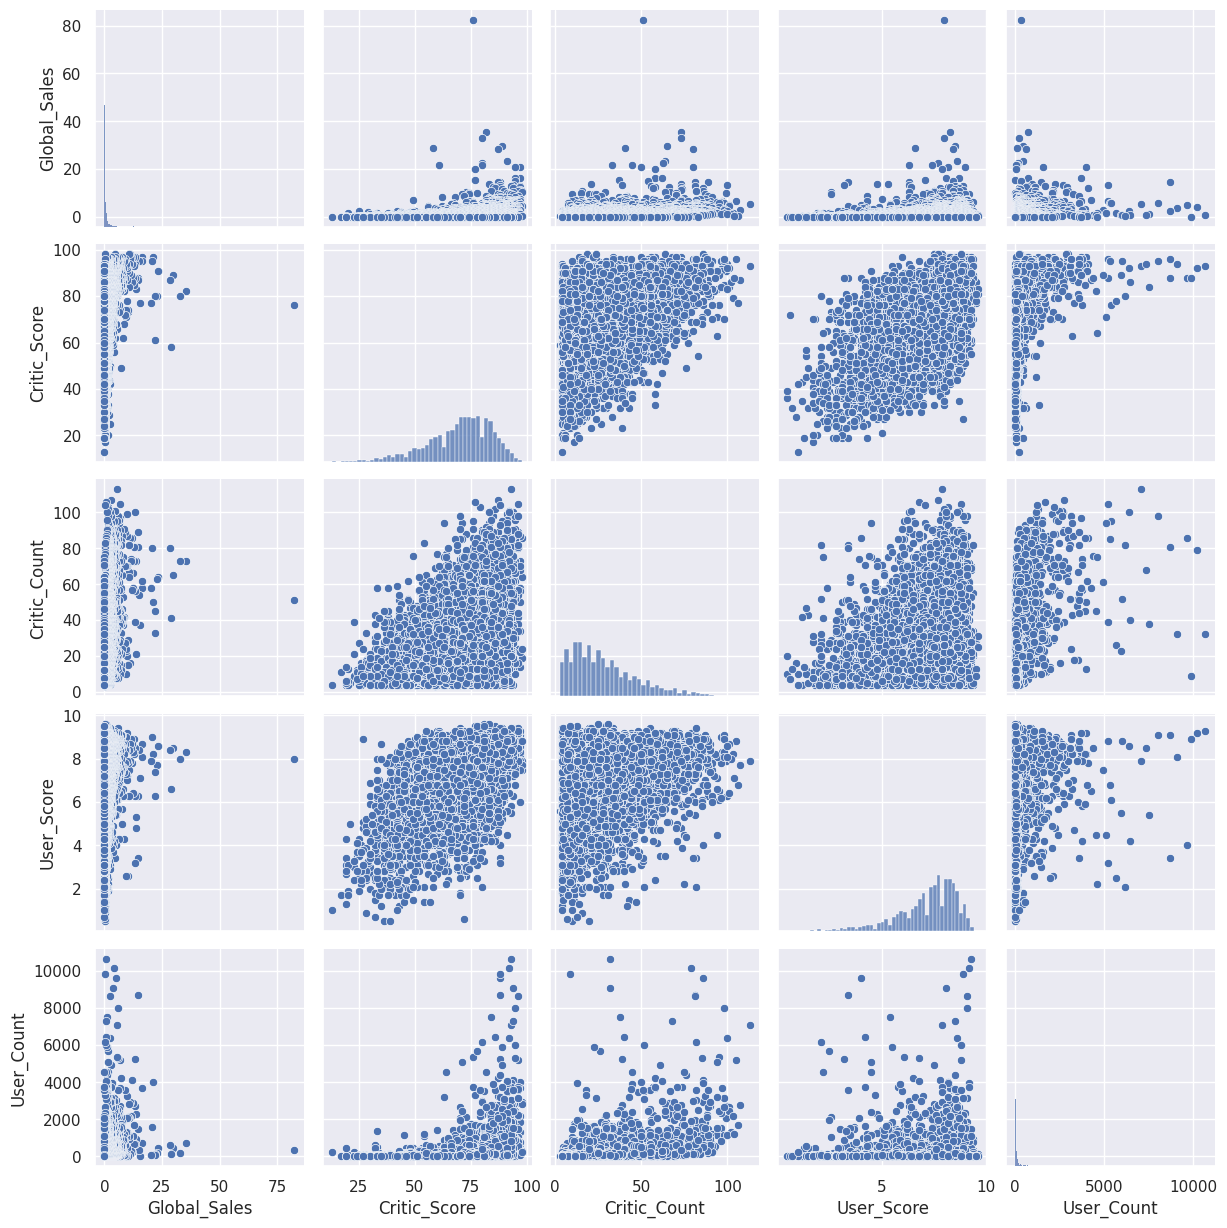

In [ ]:
# `pairplot()` may become slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

The distribution histograms lie on the diagonal matrix. The remaining charts are scatter plots for the corresponding pairs of features.

##histplot()
It is also possible to plot a distribution of observations with seaborn's histplot(). For example, let's look at the distribution of critics' ratings: Critic_Score

<Axes: xlabel='Critic_Score', ylabel='Density'>

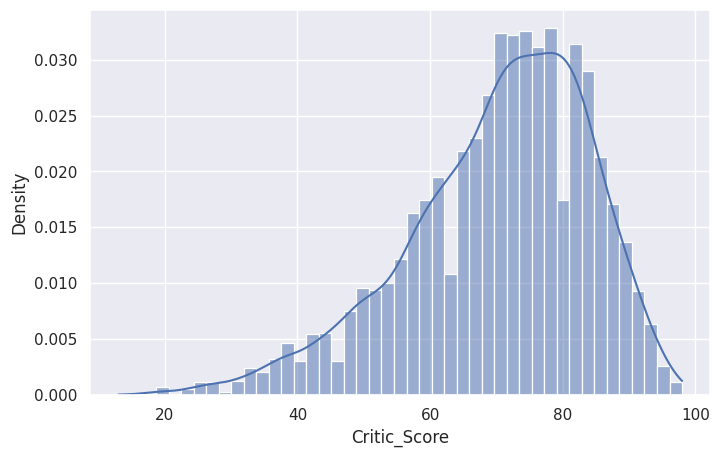

In [ ]:
%config InlineBacked.figure_format = 'svg'
sns.histplot(data=df["Critic_Score"],kde=True, stat="density")

##jointplot()
To look more closely a the relationship between 2 numerical variables, you can use jointplot, which is a cross between a scatter plot and histogram.Let's see how the Critic_Score and User_Score features are related.

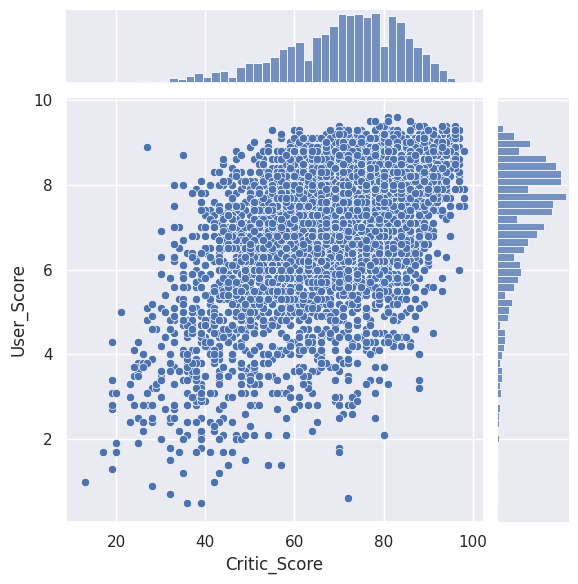

In [ ]:
sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter")

##boxplot()
Another useful type of plot is the box plot. Let's compare critics' ratings for the top 5 biggest gaming platforms.

<Axes: xlabel='Critic_Score', ylabel='Platform'>

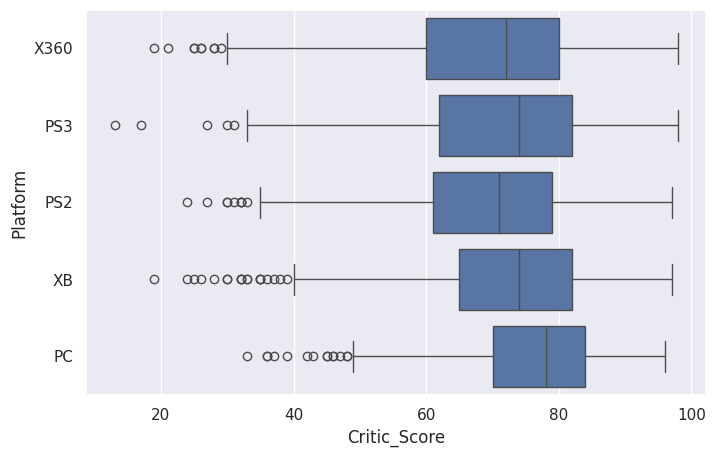

In [ ]:
top_platforms = (
    df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient="h"
)

The box of the box plot illustrates the interquartile spread of the distribution, its length is determined byt he Q1 and Q3 percentiles. Ther vertical line inside the box marks its median.

The whiskers are the lines extending from the box, they represent the entire scatter of data points specifially the points that fall within the the interval Q1 - 1.5 * IQR, Q3 + 1.5 * IQR where IQR  = Q3-Q1.

Outliers that fall out of the range bounded by the whiskers are plotted individually.

##heatmap()
A heat map allows you to view the distribution of a numerical variable over 2 categorical ones. We will visualize the total sales of the games by genre and gaming platform.

<Axes: xlabel='Genre', ylabel='Platform'>

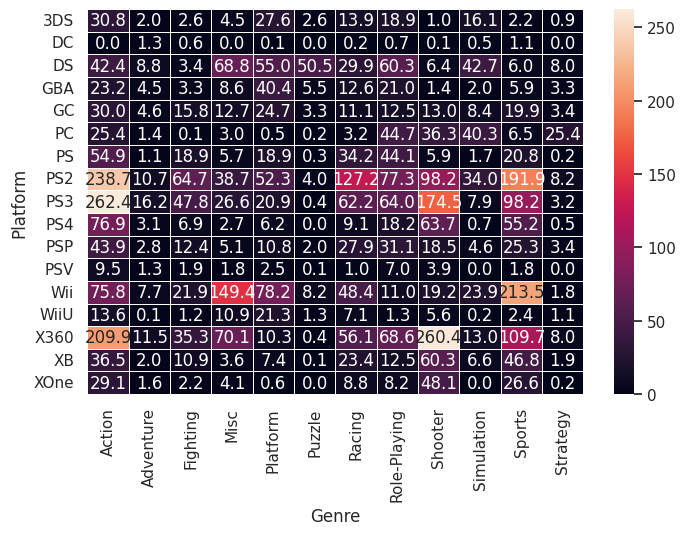

In [ ]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc="sum"
    )
    .fillna(0)
    .map(float)
)

sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5)